# ML- 4 Кластеризация
###  Содержание <a class="anchor" id=0></a>
- [1. Введение](#1)
- [2. Введение в обучение без учителя. Базовая класетизация](#2)
- [3. Метрики](#3)
- [4. Иерархическая кластеризация](#4)
- [5. ЕМ-алгоритмы кластеризации](#5)
- [6. Спектральная классификация](#6)
- [7. Кластеризация на основе плотности](#7)
- [8. Визуализация результатов кластеризации](#8)
- [9. PCA и t-SNE, или зачем понижать размерность](#9)
- [10. Практика](#10)

# 1. Введение <a class="anchor" id=1></a>

[к содержанию](#0)

<img src=ml_4_img1.png width=800>

При обучении с учителем у нас всегда есть размеченные данные, т. е. **«правильные ответы»**. В данном случае мы предсказываем бинарные значения (например, уйдёт клиент от сотового оператора или нет) или точные значения (например, прибыль, которую получит магазин). Строить модели обучения с учителем вы уже умеете.

>Однако в реальной жизни данные зачастую приходят неразмеченными. Также не всегда есть возможность размечать их вручную, так как это может быть долго и/или дорого. Например, вы можете быть владельцем интернет-магазина и собирать данные о покупках, но в ваших данных никто не ставит отметки о лояльности клиентов. Или перед вами может стоять задача отделить рентгеновские снимки, на которых есть опухоль в лёгких, от снимков, на которых опухоли нет. Пока врач вручную не разметит данные, правильных ответов для обучения модели не будет.

Если размеченных данных нет, невозможно использовать подходы обучения с учителем. В таком случае на помощь приходят **методы обучения без учителя**.

### К обучению без учителя можно отнести:

* `Методы кластеризации`. Они позволяют разделить объекты на группы, внутри которых объекты максимально похожи друг на друга.
* `Методы понижения размерности`. С их помощью можно уменьшить число признаков, которые характеризуют объект. Обычно количество признаков уменьшают до двух-трёх для дальнейшей визуализации данных или использования при обучении моделей.
* `Методы ассоциации`. Они используются для того, чтобы найти правила и законы, по которым существует последовательность действий.

### КАКИЕ ПРОБЛЕМЫ МОЖНО РЕШАТЬ С ПОМОЩЬЮ МЕТОДОВ ОБУЧЕНИЯ БЕЗ УЧИТЕЛЯ?

Используя подходы, которые мы изучим в данном модуле, мы сможем лучше понимать данные, с которыми предстоит работать, например **разделять данные на группы**, которые схожи по каким-то признакам.

* Данные до кластеризации можно сравнить с фруктовым салатом, состав которого нам нужно понять. Используя методы кластеризации и визуализацию, мы можем понять, из чего состоят наши данные (наш «салат»):

<img src=ml_4_img2.png width=800>

* Если данных, с которыми вы работаете, много, то методы машинного обучения без учителя позволяют **уменьшить их объём**, убрав схожие данные и оставив только несколько представителей различных групп.

* Если разработанная модель плохо или долго обучается, причина может быть в том, что у объекта слишком много признаков. Методы уменьшения размерности помогают **уменьшить количество признаков**, которые характеризуют объект, и ускорить обучение модели.

Например, данные, которые изначально описывались тремя признаками (куб на рисунке ниже), мы можем описать и двумя признаками, спроецировав их на плоскость. Далее мы можем спроецировать полученный результат на одну ось и описывать объекты уже одним признаком:

<img src=ml_4_img3.png width=800>

* Некоторые методы кластеризации помогают **найти выбросы в данных**.

* Методы ассоциации позволяют **создавать шаблоны**. Это может помочь правильно расставить товары на полках в магазине или спрогнозировать продукты, которые могут купить вместе (например, если человек купил творог, то, возможно, ему будет нужна и сметана).

Таким образом, методы обучения без учителя решают весьма разнообразные задачи и могут помочь Data Science-специалисту в работе.

# 2. Введение в обучение без учителя. Базовая класетизация <a class="anchor" id=2></a>

[к содержанию](#0)

>Представьте, что вы работаете дата-сайентистом и получаете задачу по маркетинговому исследованию клиентов. Вам необходимо выделить группы покупателей по степени интереса к продукту и по сумме, которую они тратят.

### Как решить данную задачу?

**Обучение с учителем здесь не подходит**, так как у нас нет правильных ответов о степени заинтересованности покупателей в продукте.

Однако не спешите расстраиваться — на помощь придёт обучение без учителя, а именно кластеризация.

Кластеризация позволяет разбить объекты на группы, которые называются `кластерами`.

<img src=ml_4_img4.png>

Также у каждого кластера есть `центроид`.

`Центроид` — это центр масс кластера, или среднее значение координат объектов кластера.

<img src=ml_4_img5.png>

### Как найти этот `центроид`?

Допустим, у нас есть маленький кластер, состоящий из четырёх точек. Каждая точка описывается только одним свойством — `x1`, рост человека:

* Человек №1 - `x1 = 180`
* Человек №2 - `x2 = 170`
* Человек №3 - `x3 = 181`
* Человек №4 - `x4 = 160`

Тогда для нахождения центроида мы берём все значения по оси `x` и считаем среднее:

`x1(центроид кластера) = (180+170+181+160) / 4 = 172`

Что делать, если данные описываются двумя свойствами, например, рост (`x1`) и вес (`x2`)?

* Человек №1 - `x1 = 180` - `x2 = 70`
* Человек №2 - `x2 = 170` - `x2 = 60`
* Человек №3 - `x3 = 181` - `x2 = 65`
* Человек №4 - `x4 = 160` - `x2 = 45`

Для нахождения координат центроида мы последовательно находим:

`x1(центроид x1) = (180+170+181+160) / 4 = 172`
`x2(центроид x2) = (70+60+65+45) / 4 = 60`

**Таким образом, координаты центроида — (172, 60)**.


## АЛГОРИТМ `K-MEANS`

Рассмотрим один из наиболее популярных методов кластеризации — `k-means`.

Данный алгоритм был разработан ещё в 1950-х, но благодаря скорости своей работы он до сих пор остаётся востребованным.

>**Идея алгоритма** состоит в том, что он разбивает множество элементов векторного пространства на заранее заданное пользователем число кластеров, а далее стремится минимизировать суммарное квадратичное отклонение объектов внутри кластера до центроида кластера.

Математически это выглядит следующим образом: 

<img src=ml_4_img6.png>


Только что мы рассмотрели, как работает алгоритм для одномерного случая (если есть только один признак, описывающий объект). Ниже вы можете увидеть, как работает алгоритм для двухмерного случая (когда объект описывается двумя признаками).

<img src=ml_4_gif.gif>

Если объект описывается тремя и более признаками, поиск кластеров идёт в `m`-мерном пространстве признаков. Однако такую работу алгоритма довольно сложно визуализировать.

Рассмотренный нами алгоритм был основан на центроидах: мы находили центры кластеров и присваивали объекты к ближайшему центроиду кластера.

На самом деле центры кластера можно определять разными способами. В зависимости от этого выделяется **несколько вариаций алгоритма `k-means`**:

<img src=ml_4_img7.png>

Теперь мы знаем, как работает алгоритм `k-means`, но не хотелось бы реализовывать его с нуля. Для того чтобы запустить алгоритм кластеризации `k-means`, нам нужна библиотека `sklearn` и модуль KMeans.

Что необходимо для запуска?

* Обязательно задать количество кластеров, на которые необходимо разделить данные.
* Данные, т. е. параметры объектов (`x1`), которые мы будем передавать в виде матрицы наблюдений X.

После этого можно запустить алгоритм и для каждого объекта в данных получить метку, к какому кластеру этот объект относится:

In [ ]:
# импортируем нужный модуль k-means-кластеризации
from sklearn.cluster import KMeans

# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
X = df[["x1", "x2", "x3"]]
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_

Таким образом, мы обучили модель кластеризации. Если нужно определить, к какому из существующих кластеров будут отнесены новые данные из `df2`, то мы просто воспользуемся методом `predict`:

In [ ]:
X_new = df2[["x1", "x2", "x3"]]
k_means.predict(X_new)

Чтобы запустить алгоритм, необходимо задать параметры кластеризации:

`n_clusters` — количество кластеров. По умолчанию — `8`.
`init` — способ инициализации центроидов. Есть две опции: `random` (выбирает центроиды случайным образом) и `k-means++` (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). По умолчанию используется `k-means++`.
`n_init` — количество случайных инициализаций алгоритма `k-means`. В конце будут выбраны те результаты, которые имеют наилучшие значения критерия `k-means`. По умолчанию `n_init = 10`.
`max_iter` — максимальное количество итераций алгоритма `k-means` при одном запуске. По умолчанию — `300`.
`random_state` — параметр, который определяет генерацию случайных чисел для инициализации центроида. Чтобы детерминировать случайность, нужно задать какое-нибудь число.

Теперь попробуем применить полученные знания на практике.

# Можно посмотреть файл `dst3-ml4-2_clusterization.ipynb`



In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('pokemon.zip')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


c:\Users\AubakirovMA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

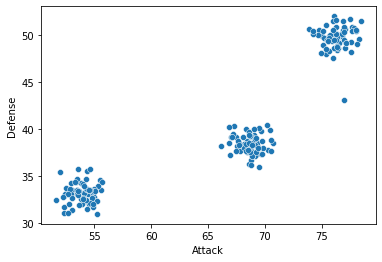

In [2]:
# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

#визуализируем
sns.scatterplot(df.Attack, df.Defense)

Из получившегося графика непонятно, сколько кластеров должно быть и как их выбрать. Попробуем разделить данные на три кластера.

Инициализируем алгоритм `k-means`. При инициализации зададим параметры моделирования:

* `n_clusters` — количество кластеров;
* `init` — стратегия кластеризации;
* `n_init` — количество запусков алгоритма `k-means`;
* `random_state` — чтобы результаты воспроизводились от запуска к запуску.

c:\Users\AubakirovMA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

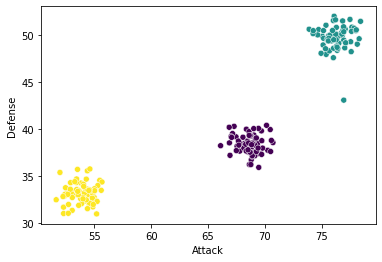

In [3]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(df.Attack, df.Defense, c=predictions)

В данном случае видно, что данные хорошо делятся на три кластера, а также есть одна точка-выброс. 

Попробуем увеличить количество кластеров до четырёх, чтобы вынести выброс в отдельный кластер:

Как видим, «отделить» выброс от других данных не получается: `k-means` не умеет обрабатывать выбросы.

>В данном случае мы проводили кластеризацию по двум признакам. Мы сделали это для того, чтобы можно было визуализировать результаты. Для кластеризации можно использовать и более двух признаков, однако в таком случае кластеризация будет проходить в `n`-мерном пространстве (для трёх признаков пространство будет трёхмерным), и визуализировать результаты будет непросто.

В трёхмерном и другом `n`-мерном случае кластеризация запускается следующим образом:

In [4]:
# добавляем третий признак — скорость покемона, алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]
 
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
 
# запускаем обучение модели
kmeans.fit(X)
 
# предсказываем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

## НЕДОСТАТКИ АЛГОРИТМА K-MEANS

* Необходимо заранее знать, на сколько кластеров мы хотим разделить данные. В учебных примерах известно, каким должно быть `k`, и определить это значение довольно легко. В реальности данные сложнее и трудно заранее предугадать, сколько кластеров мы хотим получить.

* Очевидно, что для объектов, которые в равной степени принадлежат к разным кластерам, алгоритм `k-means` будет отрабатывать плохо.

* Алгоритм чувствителен к выбросам в данных, так как выбросы сильно искажают местонахождение центроида кластера.

Например, на картинке ниже зелёная точка справа — явный выброс. Но получилось так, что этот выброс находится ближе всего к зелёному кластеру, поэтому выброс был отнесён к нему. При подсчёте центроида для зелёного кластера появится искажение, так как выброс сильно на это повлияет:

<img src=ml_4_img8.png>

* Плохо работает на данных, которые образуют удлинённые кластеры, а также на кластерах неправильной формы.

Например, если данные распределены, как на левом и среднем рисунках ниже, алгоритм `k-means` будет проводить кластеризацию некорректно и выделять два довольно странных кластера (синий и оранжевый). На правом рисунке изображены кластеры удлинённой формы, и для них `k-means` также отрабатывает плохо. Так происходит потому, что алгоритм ищет ближайших соседей и поэтому выделяет зелёным две нижних части двух разных кластеров, считая их ближайшими соседями.

<img src=ml_4_img9.png>

* Так как в самом начале работы алгоритма центроиды определяются случайным образом, результат сильно зависит от того, какие начальные объекты будут определены как центры кластеров.


## ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОГО K ДЛЯ АЛГОРИТМА `K-MEANS`

Рассмотрим, как побороть один из существенных недостатков алгоритма, а именно — как подобрать оптимальное количество кластеров.

>Для этого можно использовать несколько способов: метод локтя (`elbow plot`), статистику разрыва (`Gap Statistic Method`), коэффициент силуэта (`Average Silhouette Method`). Мы рассмотрим метод локтя и коэффициент силуэта.

**Начнём с метода локтя**.

Данный метод позволяет найти такое оптимальное число кластеров, чтобы добавление ещё одного кластера не приводило к лучшему моделированию данных.

Идея состоит в том, что в самом начале при добавлении новых кластеров качество моделирования улучшается. Эта область называется недообученной (`underfitting`).

Дальнейшее добавление новых кластеров существенно не улучшает качество моделирования, а значит стоит прекратить их добавление. Данная область называется переобученной (`overfitting`).

Чтобы определить оптимальное количество кластеров, используя метод локтя, необходимо нарисовать график, на котором по оси `x` будет отложено количество кластеров, а по оси `y` — инерция.

>**Инерция** — это сумма квадратов расстояний объектов датасета до центра масс ближайшего к ним кластера.

<img src=ml_4_img10.png>

Когда инерция быстро снижается, область считается **недообученной**, а далее, после «перегиба», идёт очень медленное снижение инерции, и область считается **переобученной**.

<img src=ml_4_img11.png>

Таким образом, нам необходимо построить график и найти тот самый перегиб с оптимальным количеством кластеров. В данном случае оптимальное количество кластеров равно 4.

Теперь реализуем это в виде кода. Нам нужно посчитать значение инерции для кластеризаций с разным количеством кластеров. Для этого напишем функцию `get_inertia`, которая будет принимать данные и количество кластеров и возвращать значение инерции:

c:\Users\AubakirovMA\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


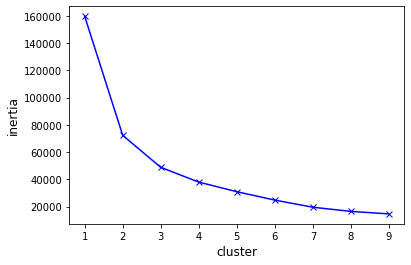

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

Как можно заметить из графика, на сгибе `k=3`. Значит, оптимальное количество кластеров, подобранное с помощью алгоритма локтя, равняется трём. Значения `k от 1 до 2` — **недообученная** область, а после значения 3 идёт **переобучение**.

>Таким образом, метод локтя — это довольно простой метод, основанный на учёте евклидова расстояния между объектами кластера и центроидами.

Однако изгиб на графике также может быть представлен нечётко:

## Однако изгиб на графике также может быть представлен нечётко:

Как быть в таком случае? Какое оптимальное количество кластеров выбрать?

Если вдруг в ходе работы вы встречаете график, на котором невозможно найти «локоть», на помощь придёт `коэффициент силуэта`.

График силуэта, в отличие от графика локтя, имеет пиковый характер, поэтому его проще визуализировать и анализировать.

На графике ниже по оси `x` отложено количество кластеров, а по оси `y` — значение коэффициента силуэта. Можно отчётливо увидеть, что пик графика приходится на количество кластеров, равное 3:

<img src=ml_4_img12.png width=600>

Коэффициент силуэта показывает, насколько объект похож на объекты кластера, в котором он находится, по сравнению с объектами из других кластеров.

Силуэт варьируется от `-1 до +1`: чем выше значение, тем больше объекты похожи на объекты своего кластера и меньше похожи на объекты соседних кластеров.

Если силуэт равен `1`, это означает, что кластеры хорошо разделены между собой и имеют высокую плотность внутри себя, например, такая кластеризация, где данные чётко разделены на три группы:

<img src=ml_4_img13.png width=600>

Возьмём красный кластер. Для объекта из красного кластера рассчитаем расстояние до каждого объекта в этом кластере (пусть это будет `a`). Далее для красного кластера найдём ближайший кластер. Посчитаем расстояние от того же объекта из красного кластера  до каждого объекта зелёного кластера (примем это значение за `b`).

Для каждой точки датасета рассчитывается значение силуэта:

`s_i = (b_i - a_i) / max(a_i,b_i)`

Далее рассчитывается среднее значение силуэта для всего датасета.

Посчитаем силуэт, используя `sklearn`:

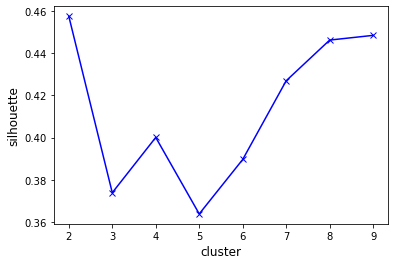

In [7]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

In [8]:
data = pd.read_csv('values_from_the_instrument.zip')
data.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


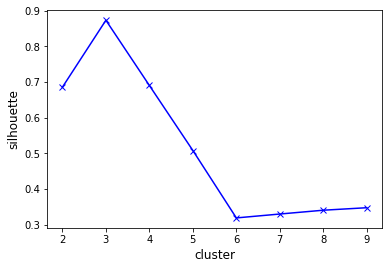

In [11]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, data))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

# 3. Метрики <a class="anchor" id=3></a>

[к содержанию](#0)

Допустим, мы разделили кошек и собак на два кластера: в каждом из кластеров находятся либо только кошки, либо только собаки. Но может получиться так, что в ходе кластеризации мы разделим одинаковых собак по разным кластерам или кошки с собаками перемешаются, как на рисунке ниже:

<img src=ml_4_img14.png width=600>

Поэтому было бы хорошо как-то оценивать, не создали ли мы лишние кластеры или одинаковые ли объекты в нашем кластере. В этом нам помогут метрики, которые мы рассмотрим далее.

Чтобы понять, правильно ли объекты распределились по кластерам, необходимо знать, в каких кластерах должны быть объекты.

>Ранее мы говорили, что кластеризация относится к методу машинного обучения без учителя и применяется, **когда нет размеченных данных**, а значит мы не знаем правильных ответов. Однако иногда размеченные данные всё же есть. В таком случае мы можем провести дополнительный анализ получившихся кластеров.

Существует ряд метрик, которые можно подсчитать, если данные размечены. Мы рассмотрим четыре метрики, которые больше всего помогут нам при анализе результатов кластеризации:

## 1. ОДНОРОДНОСТЬ КЛАСТЕРОВ (`HOMOGENEITY SCORE`)

Данная метрика, как и три последующих, может применяться, **только когда есть размеченные данные**.

>Кластер считается однородным, если в нём содержатся объекты, принадлежащие только к одному кластеру.

Значение метрики уменьшается, если объединить два разных кластера, которые содержат непохожие объекты.

Например, нам нужно распределить кошек и собак по разным кластерам. В первом случае нам это удалось, а во втором одна собака «убежала» к кошкам, одна кошка — к собакам, и животные перемешались:

<img src=ml_4_img15.png width=600>

Таким образом, во втором случае в кластере оказались разные животные, поэтому однородность снизилась.

>B первом кластере метрика однородности будет максимальной и равна `1`, во втором значение однородности будет меньше, так как животные немного перемешались. Если бы кластер был максимально неоднородный, значение метрики было бы равно `0`.

Теперь посмотрим, как рассчитать метрику однородности в `sklearn`:

In [12]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

1.0


Во втором случае мы получаем метрику, равную `1`, хотя предсказывали совершенно противоположный результат. Почему так получилось?

Допустим, наши `0` и `1` — это номера кластеров, в которых находятся кошки и собаки:

<img src=ml_4_img16.png width=600>

`labels_true` — это реальные значения: в кластере `0` — собаки, в кластере `1` — кошки. В первый раз мы предсказали, что в кластере `0` находятся две собаки, а в кластере `1` — две кошки. Метрика однородности равна `1`, так как внутри кластеров разные объекты и наши ответы полностью совпали с `labels_true`.

Во втором случае, казалось бы, будет неверно, если в кластере `0` будут кошки, а в кластере `1` — собаки. Но, судя по составу кластеров, кошки и собаки не перемешались, поэтому однородность кластеров будет равна `1`.

Рассмотрим метрику однородности на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и четырьмя кластерами:

<img src=ml_4_img17.png width=600>

In [14]:
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

1.0


Вы можете удивиться, что во втором случае метрика равна 1, но это нормально: хоть мы и разделили данные на большее количество кластеров, внутри кластеров данные остались однородными.

## 2. ПОЛНОТА КЛАСТЕРА (`COMPLETENESS SCORE`)

Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.

Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, при кластеризации оказались в одном кластере.

Значение метрики уменьшается, если эталонный кластер разделить на части. Например, если кластер, в котором находятся только собаки, разделить на два более мелких кластера, то метрика полноты у такой кластеризации будет меньше:

<img src=ml_4_img18.png width=600>

На рисунке выше `c` — это `completeness`, или полнота.

При максимальном заполнении кластеров схожими объектами полнота равняется `1` (когда есть один большой кластер со всеми собаками), при минимальном заполнении — `0`.

In [15]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])

1.0

Рассмотрим метрику полноты на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и четырьмя кластерами:

<img src=ml_4_img17.png width=600>

Во втором случае третий кластер оказался неполным, так как предсказано, что половина объектов принадлежит к третьему кластеру, а другая половина — к четвёртому. Однако два других кластера предсказаны правильно, поэтому метрика полноты меньше 1, но всё же её значение не такое низкое.

## 3. V-МЕРА (`V-MEASURE`)

Эта метрика — комбинация метрик полноты и однородности.

>Значение `V-меры` варьируется `от 0 до 1`. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно.

`V-мера` рассчитывается по формуле:

<img src=ml_4_img19.png>

>Метрику однородности кластера при кластеризации можно сравнить с метрикой `precision` из задачи классификации: метрика однородности также показывает, насколько точно мы предсказали, к какому классу принадлежит объект. Метрика полноты так же, как метрика `recall` из задачи классификации, показывает, насколько мы наполнили кластеры теми объектами, которые должны принадлежать к данным кластерам.

Данную метрику можно вычислять, когда одновременно важны и наполненность кластеров, и их однородность.

Допустим, мы разделили данные следующим образом:

<img src=ml_4_img20.png>

Если бы мы считали метрику однородности кластеров, то она была бы равна `1`, так как кластеры однородны и собаки и кошки внутри них не перемешаны. Но очевидно, что кластеризация неидеальна: вместо одного кластера с собаками у нас целых два. Поэтому если бы мы неправильно выбрали метрику (считали бы однородность) для определения качества кластеризации, то сделали бы неверные выводы. Но если мы будем считать `V-меру`, то будем одновременно учитывать оба фактора (полноту и однородность кластеров). Если же какой-то из факторов для нас важнее, мы можем изменять значение `beta`, придавая больший вес однородности кластера или полноте.

Посчитаем `V-меру` для двух случаев кластеризации датасета с покемонами:

<img src=ml_4_img21.png>

In [20]:
# импортируем из библиотеки sklearn подсчёт V-меры
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))


1.0


В первом случае и полнота, и однородность кластеров были равны `1`, поэтому `V-мера`, основанная на этих двух метриках, получила максимальное значение (1). Во втором случае полнота кластеризации была равна `0.83`, так как один из кластеров был наполнен наполовину. Этот факт отразился и на значении `V-меры`, но, так как однородность кластеров имела максимальное значение, `V-мера` приняла значение `0.9`.

## 4. ИНДЕКС РЭНДА

Данный индекс сравнивает предсказанный датасет и размеченные данные и подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере (number of agreeing pairs), среди предсказанных и размеченных данных.

<img src=ml_4_img22.png>

Вернёмся к нашим кошкам и собакам. Слева на рисунке выше — предсказанная кластеризация, справа — «правильные ответы».

Теперь для каждого объекта найдём пару предсказанное значение-реальное значение. 

`number of agreeing pairs = 5`, т. е. для трёх собак и двух кошек кластеры были предсказаны верно, а для двух пар (они соединены красной линией) — неверно.

`number of pairs = 7`

Таким образом, `Rand Index = 5/7 = 0.71`.

Запустим подсчёт индекса Рэнда в `sklearn`:

In [21]:
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])

1.0

В данном случае мы получили индекс Рэнда, равный 1. Это означает, что все объекты в предсказанном кластере попали в те кластеры, в которые должны были попасть.

<img src=ml_4_img23.png>

In [24]:
print(round(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]),2))

0.74


# 4. Иерархическая кластеризация <a class="anchor" id=4></a>

[к содержанию](#0)

Алгоритмов кластеризации настолько много, что по ним можно сделать отдельный курс. И, как вы можете догадаться, не существует такого метода кластеризации, который всегда будет выдавать хорошие результаты — всё зависит от того, с какими данными вы работаете.

На сегодняшний день существует более **40 видов кластеризации**, но общепринятой системы классификации алгоритмов кластеризации не существует.

В этом и последующих юнитах мы познакомимся с некоторыми популярными алгоритмами кластеризации:

* иерархической кластеризацией,
* EM-алгоритмами кластеризации,
* спектральной кластеризацией,
* кластеризацией на основе плотности.

Мы рассмотрим различные подходы, их плюсы и минусы, а также применение.

>Принцип иерархической кластеризации основан на построении дерева (иерархии) вложенных кластеров.

При иерархической кластеризации строится дендрограмма. Её можно сравнить с древом языков мира, на котором языки объединяются в различные семьи, укрупняясь и образуя всё более обширные языковые ветви:

<img src=ml_4_img24.png>

>**Дендрограмма**  — это древовидная диаграмма, которая содержит \(n\) уровней. Каждый уровень — это шаг укрупнения кластеров.

<img src=ml_4_img25.png>

Перейдём к более реальным примерам.

Например, дендрограмма для кластеризации трёх видов ирисов будет выглядеть следующим образом:

<img src=ml_4_img26.png>

>Справа расположены листья дендрограммы. Внизу дендрограммы отложена схожесть объектов. Количество уровней дендрограммы соответствует числу шагов слияния или разделения кластеров. На листьях находятся исходные объекты. Далее мы объединяем эти объекты в маленькие группы — это первый шаг кластеризации. После этого с каждым шагом объекты образуют всё большие и большие кластеры, пока на последнем шаге не образуется один большой кластер (корень дендрограммы), содержащий все три вида ирисов. Для определения количества кластеров на каждом шаге мы можем мысленно проводить вертикальную линию и смотреть, сколько внутренних веток пересекла эта линия. 
>
>Наши линии на картинке пересекают две и четыре линии. Это означает, что на этих шагах данные делятся на два или четыре кластера.

Если ещё раз посмотреть на график с дендрограммой ирисов, можно сказать, что при кластеризации мы можем пойти снизу вверх (от листьев к корню) или сверху вниз (от корня к листьям). И действительно — при иерархической кластеризации выделяют два подхода: `агломеративный` и `дивизионный`. В первом случае кластеры образуются **снизу вверх**, т. е. при объединении кластеров, а во втором — **сверху вниз**, в ходе деления крупных кластеров:

<img src=ml_4_img27.png>

## Агломеративный метод (`agglomerative`)

Новые кластеры создаются в ходе объединения более мелких кластеров:

<img src=ml_4_img28.png>

## Дивизионный (дивизивный) метод (`divisive`)

Кластеры создаются при делении крупных кластеров:

<img src=ml_4_img29.png>

Для того чтобы построить дендрограмму, нужна матрица сходства, построенная на основе расстояний между кластерами.

В общем виде матрица сходства выглядит следующим образом:

<img src=ml_4_img30.png>

\(K\) — это мера сходства между двумя кластерами. По диагонали в матрице записаны единицы, так как объекты максимально похожи на самих себя.

Чтобы рассчитать данную матрицу, нужно знать расстояния между двумя кластерами. Существуют разные подходы его вычисления, и выбранный подход влияет на результат кластеризации.

<img src=ml_4_img31.png>

В зависимости от того, каким способом рассчитывается расстояние, можно получить разные результаты кластеризации.

На картинке ниже рассматривается иерархическая кластеризация при использовании разных подходов для подсчёта расстояния

<img src=ml_4_img32.png width=600>

В первом столбце представлено использование метода одиночной связи, во втором — метода средней связи, в третьем — метода полной связи.

Различные кластеры обозначены разными цветами: `оранжевым`, `зелёным` и `синим`. 

Как видим, иерархическая кластеризация с использованием метода одиночной связи хорошо отрабатывает на первых двух распределениях датасетов, но очень плохо справляется с вытянутыми и перекрывающимися данными. Алгоритм иерархической кластеризации работает по принципу «богатый становится богаче». Это может приводить к неравномерному распределению кластеров. Данный способ больше других страдает от неравномерного распределения кластеров: это можно наблюдать в третьей, четвёртой и шестой строках части Single Linkage на картинке — мы видим очень редкие вкрапления зелёного кластера, а всё остальное пространство принадлежит синему кластеру.

Использование методов средней связи и полной связи приносит хорошие результаты только при условии, что данные имеют высокую плотность и не пересекаются, или же для однородно распределённых данных. В остальных случаях они отрабатывают плохо.

# ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ?

## * Для построения филогенетического дерева.

Например, если известна ДНК-последовательность, можно построить филогенетическое дерево.

На рисунке ниже иерархическая кластеризация была проведена на основе ДНК животных:

<img src=ml_4_img33.png width=600>

## * Для анализа текстов.

Например, с помощью кластеризации Брауна (частный случай иерархической кластеризации) можно сгруппировать слова и найти синонимы. Слова, которые были встроены в похожие контексты и считаются семантически связанными, оказываются в одном кластере:

<img src=ml_4_img34.png width=600>

# КАК ЗАПУСТИТЬ ИЕРАРХИЧЕСКУЮ КЛАСТЕРИЗАЦИЮ?

Давайте попробуем кластеризовать датасет с покемонами с помощью иерархической кластеризации.

Запустим алгоритм (такой же, как `k-means`). Из библиотеки `sklearn` импортируем алгомеративную кластеризацию, далее запустим метод `fit()`, передав вектор `X` из признаков объектов, и обучим модель кластеризации.

In [25]:
from sklearn.cluster import AgglomerativeClustering

agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
agglomerative_clustering.fit(X)
agglomerative_clustering.labels_


array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

Базовые параметры, которые необходимо передать в `AgglomerativeClustering`:

`n_clusters` — количество кластеров; по умолчанию — `2`.
`linkage` — метод определения расстояния между кластерами, которое мы рассматривали выше. Можно выбрать `single`, `ward`, `average`, `complete`; по умолчанию используется `ward`.

## Какое количество кластеров задать в начале?

* Иногда при постановке задачи может быть чётко указано, что необходимо разделить данные на `N` кластеров. В таком случае проблем не возникнет.
* Если кластеризацию требуется провести по двум-трём признакам, можно визуализировать данные и прикинуть, на сколько кластеров их можно разделить.
* Выбрать какое-нибудь количество кластеров, например три-четыре, провести кластеризацию и визуализировать дендрограмму. Далее, основываясь на дендрограмме, можно примерно определить оптимальное количество кластеров.

Чуть позже мы научимся визуализировать дендрограмму, а сейчас давайте посмотрим на дендрограмму проведённой кластеризации. Попытаемся понять, какое оптимальное количество кластеров для кластеризации нужно выбрать. Дендрограмма получилась большой и сложной для восприятия и понимания. Можно увидеть, что, если мы проведём горизонтальную линию на расстоянии между кластерами, равном 6, данные отлично разделятся на три кластера:

<img src=ml_4_img35.png width=600>

## Плюсы
* Можно построить дендрограмму и понять, как устроены данные.
* Работает на небольшом датасете.

## Минусы
* Необходимость выбора оптимального количества кластеров.
* Если данных много, дендрограмма становится большой и сложной для понимания.
* Может неравномерно разделять данные на кластеры.

# 5. ЕМ-алгоритмы кластеризации <a class="anchor" id=5></a>

[к содержанию](#0)

Один из примеров `EM` (`Expectation-maximization`)-алгоритма — это `k-means`-кластеризация, рассмотренная нами ранее.

Алгоритм состоит из двух шагов. Если рассмотреть их на примере `k-means`, то:

* на шаге `E` мы вычисляем, к какому кластеру будет относиться объект на основании расстояний до центроида;
* на шаге `M` мы пересчитываем центроиды кластеров.

Когда данные распределены в форме вытянутых эллипсов (см. график ниже), алгоритм `k-means` не справляется с кластеризацией. В качестве альтернативы можно взять ещё один из алгоритмов `EM`-кластеризации — модель гауссовой смеси (`Gaussian Mixture Model`, `GMM`), в котором данные описываются функцией Гаусса. Это значит, что мы можем выделить два параметра для описания кластеров: среднее значение и стандартное отклонение. Если рассмотреть двухмерный случай, то кластеры могут принимать любую эллиптическую форму, так как есть стандартное отклонение в обоих направлениях (по `x` и по `y`).

На шаге `E` данного алгоритма мы будем определять вероятность того, что объект принадлежит к кластеру, а на шаге `M` будем пересчитывать параметры функции `Гаусса`, чтобы подобрать наиболее подходящие кластеры для наших данных.

На анимации ниже гауссовы функции подгоняются под размеры кластеров:

<img src=ml_4_gif1.gif>

## ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ `EM-КЛАСТЕРИЗАЦИЯ`?

* `K-means`-кластеризацию можно использовать для кластеризации документов по разным категориям, основываясь на тегах, заголовках или содержимом документа. Для этого текст документа представляется в виде вектора, а далее используется в кластеризации. Если у разных документов похожие векторы, их можно объединить в одну группу.

<img src=ml_4_img36.png>

* `GMM` можно использовать для сегментации изображений, например чтобы находить опухоли на снимках МРТ. Для этого мы представляем изображение в виде вектора и далее используем такое представление снимка в кластеризации.

<img src=ml_4_img37.png width=300>

* Используя `GMM`, можно анализировать временные ряды цен в периоды действия акций.

## КАК ЗАПУСТИТЬ EM-КЛАСТЕРИЗАЦИЮ?

Запустим алгоритм на датасете покемонов и попробуем кластеризовать их по силе атаки и уровню защиты:

In [26]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

Основные параметры, которые необходимо задать для запуска алгоритма `GaussianMixture`:

* `n_components` — количество кластеров.
* `random_state` — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

Параметров при запуске может быть больше, при желании можно почитать о них в документации `sklearn`:

In [31]:
from sklearn.mixture import GaussianMixture
help(GaussianMixture)
class GaussianMixture(sklearn.mixture._base.BaseMixture)

SyntaxError: invalid syntax (2427902091.py, line 3)

## ПРЕИМУЩЕСТВА И НЕДОСТАТКИ EM-КЛАСТЕРИЗАЦИИ

## Плюсы

* Кластеры, которые находит этот алгоритм, могут принимать форму эллипса, а не ограничиваться окружностями. K-Means является частным случаем GMM.
* Если объект находится в середине двух перекрывающихся кластеров, то, в отличие от k-means, не нужно решать, к какому кластеру он принадлежит: объект может принадлежать к двум разным кластерам с разной вероятностью.

## Минусы

* Нужно задавать количество кластеров.
* Чувствителен к тому, с какой точки начинается алгоритм.
* Может медленно сходиться, т. е. искать, как оптимально описать кластеры.

In [35]:
data = pd.read_csv('housing.zip')
data.describe()

,year,price
count,1355.000000,1355.000000
mean,7.774981,14.353831
std,4.699593,5.634287
min,0.008069,7.033202
25%,1.700321,10.296333
50%,9.284250,11.303921
75%,11.908790,21.686521
max,14.145547,24.690911


In [61]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=5, random_state=42)

# обучаем модель 
gm_clustering.fit(data)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(data)
data['clast_GMM'] = pd.Series(gm_prediction)

In [62]:
from sklearn.cluster import AgglomerativeClustering

agglomerative_clustering = AgglomerativeClustering(n_clusters=5)
agglomerative_clustering.fit(data)
data['clast_k-mean'] = pd.Series(agglomerative_clustering.labels_)
data


,year,price,clast_GMM,clast_k-mean
0,0.081091,23.790515,1,0
1,9.483270,10.784598,4,4
2,9.901805,10.003782,4,4
3,1.930438,21.879849,1,0
4,1.618601,21.851806,1,0
...,...,...,...,...
1350,12.580032,10.122039,3,2
1351,12.488949,9.934954,3,2
1352,10.693618,12.083653,0,3
1353,12.455530,10.304081,3,2


In [63]:
(data['clast_GMM'] == data['clast_k-mean']).value_counts()

False    1175
True      180
dtype: int64

# 6. Спектральная классификация <a class="anchor" id=6></a>

[к содержанию](#0)

Данный тип кластеризации использует собственные значения (спектр) матрицы сходства данных, чтобы снизить размерность данных и далее провести кластеризацию.

Более подробно со спектром вы познакомитесь, когда будете изучать линейную алгебру.

Алгоритм спектральной кластеризации состоит из четырёх шагов:

1. На первом шаге мы **создаём граф**, количество вершин которого равняется **количеству объектов в датасете**.

Рёбра графа, соединяющие две вершины, будут содержать информацию о схожести двух объектов, находящихся в вершине.

Информацию о схожести вершин записываем в матрицу, строки и столбцы которой — это вершины, а в ячейку записана схожесть двух вершин:

<img src=ml_4_img38.png width=800>

2. После этого проводим некоторые **математические преобразования** этой матрицы. Это нужно для того, чтобы далее мы могли описать вершину графа не шестью признаками, а всего одним:

<img src=ml_4_img39.png width=800>

3. Далее **уменьшаем размерность** данных.

Сейчас одна вершина описывается шестью признаками, а значит, если проводить кластеризацию этих данных, кластеризация будет в шестимерном пространстве. С помощью подходов понижения размерности мы можем уменьшить количество признаков, описывающих вершину. На данный момент вникать в суть преобразований нам не нужно (в одном из следующих юнитов этого модуля мы разберём эту задачу более подробно) — сейчас важно понять саму идею преобразования, а также то, что до понижения размерности мы описывали одну вершину графа шестью признаками, а после преобразования стали описывать её одним признаком:

<img src=ml_4_img40.png width=800>

Теперь одна вершина описывается одним признаком.

4. Далее **проводим кластеризацию матрицы** с уменьшенной размерностью.

Основываясь на значениях признаков `v2`, мы можем определить вершины `1`, `2` и `3` в один кластер, а вершины `4`, `5`, `6` — в другой. То, что разные вершины стали принадлежать к разным кластерам, можно визуализировать следующим образом:

<img src=ml_4_img41.png width=800>

Таким образом, мы **«разрезаем» исходный граф на два более маленьких графа**. Каждый подграф — это отдельный кластер. Мы разрезаем граф так, чтобы похожие вершины оказываются в одном подграфе, а непохожие — в другом.

В самом начале мы не могли так разрезать граф, так как было непонятно, как разделить его так, чтобы похожие вершины оказались в одном кластере. Применив математические преобразования, мы смогли это сделать и таким образом кластеризовали наши данные.

## ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ СПЕКТРАЛЬНАЯ КЛАСТЕРИЗАЦИЯ?

Данный метод широко используется **для сегментации изображений**. В данном случае **вершины графа — это пиксели изображения**.

Например, если у нас есть зашумлённая картинка (ниже слева), на которой нужно сегментировать изображение и выделить разные кластеры, то спектральная кластеризация отлично подойдёт для такой задачи. Результаты сегментации можно наблюдать на картинке справа:

<img src=ml_4_img42.png>

In [108]:
import numpy as np

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)



radius1, radius2, radius3, radius4 = 16, 14, 18, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2

In [109]:
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

In [110]:
from sklearn.feature_extraction import image

graph = image.img_to_graph(img, mask=mask)

In [111]:
graph.data = np.exp(-graph.data / graph.data.std())

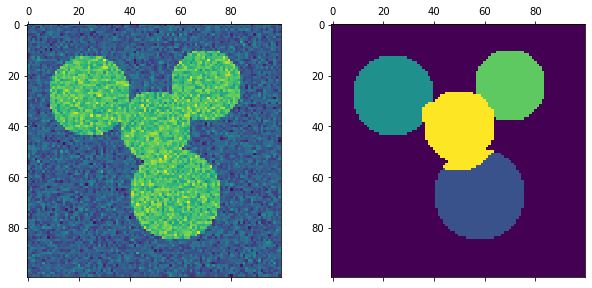

In [112]:
from sklearn.cluster import spectral_clustering
import matplotlib.pyplot as plt

labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()

## КАК ЗАПУСТИТЬ СПЕКТРАЛЬНУЮ КЛАСТЕРИЗАЦИЮ?

Рассмотрим это на нашем примере датасета с покемонами:

In [113]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

Основные параметры `SpectralClustering`:

* `n_clusters` — количество кластеров; по умолчанию — `8`.
* `random_state` — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску необходимо передать какое-то число.
Визуализируем результаты:

<img src=ml_4_img43.png>

## Плюсы спектральной

* Подходит для кластеризации данных с большим количеством признаков, так как использует технику понижения размерности.

* Эффективна для кластеризации разрежённых данных.

* Хорошо работает на практически любых распределениях данных. На рисунке ниже представлены результаты кластеризации данных с разным распределением признаков:

* Алгоритм показал хорошие результаты во всех случаях, за исключением данных в форме вытянутого эллипса (столбец 3).

## Минусы спектральной

* Нужно заранее задавать количество кластеров.

* Подходит для задач сбалансированной классификации, то есть количество точек между кластерами не сильно отличается.

# 7. Кластеризация на основе плотности <a class="anchor" id=7></a>

[к содержанию](#0)

Такая кластеризация находит в датасете области с высокой плотностью и на их основе образует кластеры. Редкие объекты, которые находятся в отдалении от других данных и для которых нужен отдельный кластер, считаются шумом.

При кластеризации на основе плотности нам не нужно задавать количество кластеров — алгоритм сам определяет оптимальное число. Такой алгоритм кластеризации отлично справляется с выбросами и с данными произвольной формы.

## `DBSCAN` (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)

Данный алгоритм применим, если:

* перед вами стоит задача с данными сложной формы, например выделение районов на карте:

<img src=ml_4_img44.png>

* в данных **большое количество выбросов**, например данные медицинских анализов пациентов.

>Преимущества алгоритма DBSCAN:
>
>* В отличие от `k-means`, не нужно задавать количество кластеров — алгоритм сам определит оптимальное.
>* Алгоритм хорошо работает с данными **произвольной формы**.
>* `DBSCAN` отлично справляется с **выбросами в датасетах**.

Посмотрим на рисунок, где показано, как два разных алгоритма отрабатывают на разных данных. Первая строчка — это алгоритм `DBSCAN`, вторая — `k-means`. Данные имеют разное распределение: например, данные в первом столбце распределены в виде двух окружностей (синей и оранжевой), данные в четвёртом столбце — в виде трёх отдельных кластеров.

<img src=ml_4_img45.png>

Как видим, алгоритм `DBSCAN` хорошо справился с первыми двумя способами кластеризации, а в третьем случае результаты работы обоих алгоритмов несколько спорные. Если датасеты хорошо разделены, как в четвёртом случае, оба алгоритма справляются хорошо. Если данные образуют один участок с одинаковой плотностью данных, `DBSCAN` **не может разделить такие данные**.

Давайте подробнее посмотрим, как работает `DBSCAN`. Допустим, у нас есть признаки `\(X = \left \{ x_{1}, x_{2} \right \}\)` (значения роста и веса людей). Если визуализировать эти данные, становится понятно, что их можно разделить на два кластера, а также наблюдаются выбросы (серые точки):

<img src=ml_4_img46.png>

Так как розовый кластер огибает синий, у стандартных методов вроде `k-means` могут быть трудности при кластеризации. При использовании `k-means` мы можем получить следующие результаты:

<img src=ml_4_img47.png>

Алгоритм `DBSCAN` поможет не допустить такого.

>Чтобы понять, как он работает, вспомните, на какую информацию вы обращаете внимание, когда смотрите на данные и пытаетесь их кластеризовать. Обычно мы смотрим на плотность распределения данных: там, где большая плотность, и будет кластер, а точки, находящиеся в области низкой плотности, обычно считаются выбросами. Чтобы алгоритм кластеризовал данные, как человек, ему нужно кластеризовать, основываясь на плотности данных.

## Рассмотрим работу алгоритма кластеризации `DBSCAN`

1. Сначала необходимо выбрать случайный объект в данных (на рисунке выбранная точка выделена красным) и в некотором радиусе `\(r\)` от этой точки найти всех соседей. На рисунке окружность выделена оранжевым цветом, а соседи — это все те точки, что попадают в оранжевую окружность. Радиус данной окружности задаётся и может регулироваться пользователем. Далее подсчитаем, сколько точек перекрывает окружность. В данном случае точек пять:

<img src=ml_4_img48.png width=400>

Далее будем выбирать точки в данных и таким же образом находить соседей этих точек.

Посмотрим на одну из точек, которая находится в отдалении от всех других. Можно заметить, что в заданном радиусе у неё нет никаких соседей:

<img src=ml_4_img49.png width=400>

2. Выделим центральные точки (`core points`).

>**Центральными** будут считаться точки, вокруг которых находится **три или более объектов**. Данное значение обычно задаётся пользователем.

В наших данных четыре выделенные точки (красные точки на картинке выше) будут считаться центральными, так как вокруг них расположено три и более точек. Пятая красная точка не будет считаться центральной, так как вокруг неё нет соседей.

Находим центральные точки во всём датасете. Это будет выглядеть так:

<img src=ml_4_img50.png width=400>

3. Среди центральных точек выберем случайным образом одну и примем, что эта точка относится к первому кластеру. Далее найдём все центральные точки, находящиеся в заданном радиусе от этой точки:

<img src=ml_4_img51.png width=400>

Они также будут отнесены к первому кластеру. На рисунке выше эти точки выделены розовым.

Если же в заданном радиусе окажутся не только центральная, но и нецентральная точки, то на данном этапе такая точка не будет добавлена в кластер. Таким образом, мы получили первый, розовый, кластер:

<img src=ml_4_img52.png width=400>

4. После того как центральные точки в первом кластере заканчиваются, мы начинаем находить нецентральные точки, которые располагаются в радиусе `\(r\)` от объектов, принадлежащих первому кластеру. На рисунке ниже эти точки указаны стрелкой и теперь тоже принадлежат к кластеру 1:

<img src=ml_4_img53.png width=400>

5. Далее переходим к неразмеченной области в данных (второй кластер с красными точками). Заново повторяем алгоритм, начиная с пункта 3, и в итоге получаем второй, синий, кластер:

<img src=ml_4_img54.png width=400>

Точки, которые не имеют соседей в заданном радиусе, считаются выбросами и не принадлежат ни к одному кластеру. На рисунке выше они обозначены серым.

## ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ `DBSCAN`?

Данный алгоритм довольно популярный — областей его применения много.

* Можно использовать `DBSCAN` для разработки системы рекомендаций в магазине. Если мы точно не знаем, на какие группы можно разделить пользователей, то на основе того, что покупают люди, можно провести `DBSCAN`-кластеризацию.

>Например, два покупателя оказались в одном кластере: один купил печенье, книгу и плед, а второй — только книгу и плед. На основе этой информации мы можем порекомендовать второму покупателю купить ещё и печенье.

* Данный алгоритм успешно справляется с поиском выбросов в данных. Рассмотренные ранее алгоритмы кластеризации, в отличие от `DBSCAN`, не выделяют выбросы в отдельные объекты.

>Это свойство алгоритма можно использовать для поиска отклонений медицинских показателей пациентов или для анализа финансового мошенничества.

* Часто `DBSCAN` применяют для кластеризации геоданных, так как он может выделять данные сложной формы.

>Например, на основе статистики заказов такси в пятничный вечер с помощью кластеризации можно выделить районы города, куда можно поехать отдыхать в преддверии выходных. Ваши коллеги из отдела `Data Science` в компании «Ситимобил» провели такой анализ для Петербурга и получили следующие результаты:
>
><img src=ml_4_img55.png width=600><img src=ml_4_img56.png width=300>

# КАК ЗАПУСТИТЬ `DBSCAN` В `SKLEARN`?

Запуск алгоритма довольно простой и похож на запуск `k-means`. Вновь обратимся к нашему датасету с покемонами.

c:\Users\AubakirovMA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

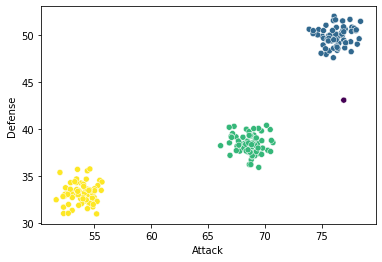

In [124]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=2, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(df.Attack, df.Defense, c=clustering.labels_)

Основные параметры для запуска `DBSCAN`:

* `eps` — это радиус, про который мы говорили выше, когда рассматривали алгоритм. Это один из важнейших параметров в алгоритме DBSCAN. Попробуйте изменять его и посмотрите, как будут меняться кластеры в зависимости от значения параметра. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.
* `min_samples` — задаёт необходимое количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.

# Плюсы `DBSCAN`

* Не нужно задавать количество кластеров.

* Устойчив к шуму и выбросам, может находить выбросы в данных.

* Способен найти кластеры любой геометрической формы.

# Минусы  `DBSCAN`

* Не может качественно кластеризовать наборы данных с большой разницей в плотности.

* Равноудалённые от двух кластеров объекты могут быть отнесены к тому кластеру, с которого алгоритм начал работать, что не всегда оказывается верным.

* Бывает сложно подобрать `eps`.

<img src=ml_4_img57.png>

In [1]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN
import seaborn as sns
import pandas as pd

data = pd.read_csv('housing.zip')
data.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


In [2]:
data.year

0        0.081091
1        9.483270
2        9.901805
3        1.930438
4        1.618601
          ...    
1350    12.580032
1351    12.488949
1352    10.693618
1353    12.455530
1354     9.509651
Name: year, Length: 1355, dtype: float64

c:\Users\AubakirovMA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

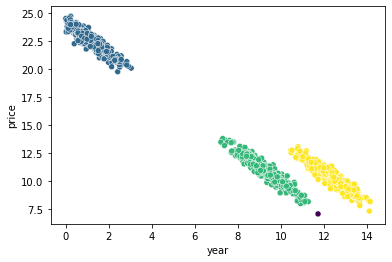

In [144]:

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=0.7, min_samples=5).fit(data)

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(data.year, data.price, c=clustering.labels_)

# 8. Визуализация результатов кластеризации <a class="anchor" id=8></a>

[к содержанию](#0)

В зависимости от количества признаков, описывающих объект, можно выделить две разновидности визуализации: `2D` и `3D`.

Если объект описывается двумя признаками, например рост и вес, эти значения легко распределить по осям `X` и `Y`. Если прибавляется ещё один признак, понадобится дополнительная ось `Z`, и график будет трёхмерным. В зависимости от алгоритма кластеризации мы можем просто визуализировать кластеры или же нарисовать дендрограмму.

В данном юните мы рассмотрим следующие способы визуализации:

* `диаграмма рассеяния` для двухмерного и трёхмерного случаев;
* `Convex Hull`, или выпуклая оболочка;
* `дендрограмма`;
* `Clustergram`.

<img src=ml_4_img58.png width=800>

# Тут можно посмотреть файл `dst3-ml4-5_visualization.ipynb`

<img src=ml_4_img59.png>

# 9. PCA и t-SNE, или зачем понижать размерность <a class="anchor" id=9></a>

[к содержанию](#0)

**Трудности могут возникнуть, если:**

* нужно визуализировать результаты кластеризации, а пространство признаков многомерное.
* нужно обучить модель, а объект описывается большим количеством признаков. Эти признаки могут быть избыточными или малоинформативными, что приведёт к плохим результатам при обучении модели.

Избежать этих проблем поможет `снижение размерности данных`.

Мы встречались с уменьшением размерности ранее, например когда рассматривали спектральную кластеризацию. В данном юните мы поближе познакомимся с тем, как работают алгоритмы снижения размерности, рассмотрим такие техники, как `PCA` и `t-SNE`.

>**Задача снижения размерности** — это задача преобразования данных с целью уменьшения количества признаков, которые описывают объект.

Как вы можете догадаться, при уменьшении количества признаков мы теряем часть информации. Например, на изображении ниже Губка Боб после уменьшения размерности стал описываться меньшим количеством признаков и поэтому стал выглядеть по-другому.

<img src=ml_4_img60.png>

Методы снижения размерности могут преобразовывать данные двумя способами:

* **линейно**,
* **нелинейно**.

# PCA

Метод главных компонент, или `PCA` (`Principal Components Analysis`) — это один из базовых способов уменьшения размерности.

Данный метод имеет широкое применение:

## Подавление шума на изображениях.

Изображение состоит из пикселей, которые можно рассматривать как набор точек в многомерном пространстве. С помощью метода снижения размерности `PCA` можно преобразовать этот набор точек и оставить только первые компоненты, полученные после преобразования. В этих компонентах будет содержаться основная информация об изображении, но не будет шума. Таким образом мы улучшим качество изображения.

Качество картинки с шумом и без него:

<img src=ml_4_img61.png>

## Индексация видео для быстрого поиска по базе.

Каждый кадр видео можно преобразовать с помощью `PCA` и представить несколькими значениями. Далее эти значения легко хранить и искать в базе.

Для уменьшения размерности метод главных компонент проводит линейное преобразование пространства, которое сохраняет длины векторов. Таким образом происходит отображение признаков в новое пространство с меньшей размерностью.

В новом пространстве появляются новые оси. Они строятся таким образом, что для первой оси дисперсия данных должна быть максимальной, а вторая ось ортогональна первой и имеет максимально возможную дисперсию.

Первой главной компонентой будет называться первая ось в новом пространстве.

Например, если у нас есть данные о полученных студентами баллах на экзаменах по двух предметам, мы можем визуализировать эти данные в 2D-пространстве, где по оси `x` будут баллы по одному предмету, а по оси `y` — по второму:

<img src=ml_4_img62.png>

Далее мы вводим две новые оси, которые являются линейными комбинациями предыдущих. Ось `PC1` проходит через максимальную дисперсию данных и является суммой исходных осей, а ось `PC2` является разницей двух исходных осей, перпендикулярна первой оси и тоже проходит через максимальную оставшуюся дисперсию:

<img src=ml_4_img63.png>

Таким образом, мы получили первую главную компоненту и вторую компоненту. При этом первая компонента несёт в себе максимум информации о данных, а в каждой последующей компоненте информации всё меньше.

# Рассмотрим, как запустить PCA с помощью библиотеки `sklearn`:

In [3]:
# из модуля decomposition библиотеки sklearn импортируем класс PCA
from sklearn.decomposition import PCA
# создаём объект класса PCA
# n_components — задаём количество компонентов для проведения трансформации
pca = PCA(n_components=2, random_state=42)
# обучаем модель на данных X
pca.fit(X)
# применяем уменьшение размерности к матрице X
pca.transform(X)

NameError: name 'X' is not defined

In [4]:
# загрузим датасет MNIST
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784")
# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']
# разделим данные с помощью sklearn на данные для обучения и теста
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

# импортируем StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
# трансформируем датасеты train_x и test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# импортируем класс PCA
from sklearn.decomposition import PCA

# создадим объект класса PCA
pca = PCA(n_components=300)
pca.fit(train_x)
# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

c:\Users\AubakirovMA\Anaconda3\lib\site-packages\sklearn\datasets\_openml.py:65: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


URLError: <urlopen error [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение>

Посмотрим, сколько признаков описывало объект до и после уменьшения размерности. Как мы можем заметить, сначала было 787 признаков, а в конце объект описывают уже 300 главных компонент:

In [ ]:
print(len(train_x[0]))
print(len(train_x_pca[0]))

Обучим модель логистической регрессии, которая на вход будет принимать пиксели изображения и предсказывать, что на нём нарисовано.

Напишем функцию, которая будет принимать на вход данные для обучения (матрицу с признаками и правильные ответы) и данные для тестирования модели, а на выходе будет возвращать время, затраченное на обучение модели, и качество модели. В качестве метрики оценивания качества будем использовать метрику accuracy.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# напишем функцию, которая на вход принимает X и y, а возвращает модель и время
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    # создадим объект класса LogisticRegression
    log_reg_model = LogisticRegression(max_iter=1000)
    from time import time
    # запишем время с начала эпохи в секундах до обучения модели
    start_time = time()
    # обучим модель
    log_reg_model.fit(train_x, train_y)    
    # запишем время с начала эпохи в секундах после обучения
    end_time = time()
    # подсчитаем время, потраченное на обучение модели
    time = end_time-start_time
    # предскажем на тестовых данных
    y_pred = log_reg_model.predict(test_x)
    # посчитаем скор для тестового предсказания
    score = accuracy_score(test_y, y_pred)
    # вернём время, потраченное на обучение, и качество полученной модели
    return time, score

model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
print(f"Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc}")
# Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 54.12072825431824, метрика модели 0.9255714285714286

model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)
print(f"Модель, построенная на всех исходных признаках. Время обучения {model_time}, метрика модели {model_acc}")
# Модель, построенная на всех исходных признаках. Время обучения 108.04033303260803, метрика модели 0.9187142857142857

Как видим, в данном случае мы потратили на обучение модели в два раза меньше времени, а качество осталось практически таким же.

В реальной работе бывает гораздо больше данных и на обучение модели уходит отнюдь не две минуты. Таким образом, применив технику уменьшения размерности, можно существенно сэкономить время.

>Мы научились ускорять обучение моделей с помощью понижения размерности данных, а теперь давайте научимся визуализировать многомерное пространство.

# T-SNE

Для того чтобы визуализировать многомерное пространство признаков, необходимо уменьшить его размерность до двухмерного или трёхмерного. В этом поможет `t-SNE` (`t-distributed Stochastic Neighbor Embedding`), что переводится с английского как «стохастическое вложение соседей с t-распределением». 

>`t-SNE`, в отличие от `PCA`, использует технику нелинейного снижения размерности данных. Обычно используется снижение размерности многомерного пространства до двух- или трёхмерного с целью дальнейшей визуализации. При преобразовании похожие объекты оказываются рядом, а непохожие — далеко друг от друга.

Рассмотрим `t-SNE` на примере понижения размерности двухмерного пространства до одномерного.

Если у нас есть такое распределение точек, как на графике ниже,

<img src=ml_4_img64.png>

то, казалось бы, чтобы уменьшить размерность данных, нужно просто спроецировать эти точки на ось x:

<img src=ml_4_img65.png>

Но, как мы видим, розовый и синий кластеры перестают быть различными кластерами, когда мы проецируем данные на ось `X` — данные перемешались. `t-SNE` позволяет не допускать такого.

## Алгоритм состоит из следующих шагов:

1. В исходном многомерном пространстве для каждого объекта из датасета рассчитываем евклидово расстояние между объектами. Далее с помощью нормального распределения попарно сравниваем объекты датасета. На основе этих значений строится матрица, которая содержит значения схожести объектов:

<img src=ml_4_img66.png width=800>

На рисунке выше показано, как для одной точки рассчитали расстояние до всех других точек датасета, далее получили схожесть объектов с помощью нормального распределения и построили матрицу. На данной матрице по строкам и столбцам находятся объекты датасета, а в ячейках — значения схожести двух объектов. Красным обозначена похожесть объекта на самого себя (в таком случае это значение максимально), а розовым — объекты, которые имеют большую схожесть.

2. На втором шаге мы уменьшаем размерность данных. Здесь мы случайным образом проецируем объекты из двухмерного пространства на ось `x`. Далее, как и на первом шаге, мы считаем схожесть объектов в новом пространстве, но для подсчёта используем не нормальное распределение, а `t-распределение`. После этого строим матрицу попарной схожести объектов:

<img src=ml_4_img67.png width=800>

3. Далее необходимо создать новую матрицу сходства, которая будет похожа на исходную:

<img src=ml_4_img68.png width=800>

С каждой итерацией точки перемещаются к своим ближайшим соседям из исходного многомерного пространства и удаляются от отдалённых:

<img src=ml_4_img69.png>

## Работа алгоритма выглядит так:

<IMG SRC=ml_4_gif2.gif>

На первой итерации данные расположены хаотично, но с каждой итерацией похожие объекты подходят ближе друг к другу, а непохожие отдаляются друг от друга.

# КАК ЗАПУСТИТЬ T-SNE?

In [ ]:
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE

# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X
tsne.fit(X)
# применяем уменьшение размерности к матрице X
tsne.transform(X)

Важные параметры для запуска:

* `n_components` — размерность нового пространства.
* `perplexity` — один из важнейших параметров для запуска. Этот параметр описывает ожидаемую плотность вокруг точки. Таким образом мы можем устанавливать соотношение ближайших соседей к точке. Если датасет большой, стоит установить большее значение `perplexity`. Обычно используют значения в диапазоне от 5 до 50.
* `n_iter` — количество итераций для оптимизации.
* `random_state` — так как в алгоритме есть случайность, задание random_state позволяет от запуска к запуску получать одинаковые результаты.

Теперь попробуем уменьшить размерность и визуализировать пространство пикселей, которые описывают данные рукописного начертания цифр. Сравним, какая визуализация получается при использовании `PCA` и `tSNE`.

## PCA

In [ ]:
import seaborn as sns

# создадим объект класса PCA, уменьшим размерность данных до 2
pca = PCA(n_components=2, random_state=42)

# уменьшим размерность данных
X_reduced = pca.fit_transform(train_x)
# сохраним данные в датафрейм
df_pca = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_pca['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
# визуализируем
sns.scatterplot(x=df_pca[0], y=df_pca[1], c=df_pca['c'])

## t-SNE

In [ ]:
# создадим объект класса TSNE, уменьшим размерность данных до 2
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)
# немного уменьшим количество объектов для уменьшения размерности, иначе алгоритм будет работать очень долго
X_reduced = tsne.fit_transform(train_x)
# сохраним данные в датафрейм
df_tsne = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_tsne['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], c=df_tsne['c'])

Как видим, алгоритм `t-SNE` отлично справляется с уменьшением размерности для визуализации, а вот при использовании `PCA` данные не разделились на кластеры и пересекаются друг с другом — такую визуализацию будет неудобно анализировать.

В данном юните мы изучили несколько техник уменьшения размерности данных. Эти методы используются для разных целей. Давайте кратко подведём итоги и составим сводную таблицу:

<img src=ml_4_img70.png>

# 10. Практика <a class="anchor" id=10></a>

[к содержанию](#0)

В ходе работы мы подготовим датасет, попробуем несколько видов кластеризации и оценим её качество.

In [5]:
import pandas as pd
from sklearn import preprocessing

df = pd.read_csv('segmented_customers.zip')
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,1,19.0,15.0,39.0
1,2,1,21.0,15.0,81.0
2,3,0,20.0,16.0,6.0
3,4,0,23.0,16.0,77.0
4,5,0,31.0,17.0,40.0


Проведём предобработку данных: удалим пропуски и дубли, признак `Gender` превратим в бинарный с помощью `LabelEncoder`:

In [6]:
# посмотрим, есть ли пропуски в датасете
df[df.isna().any(axis=1)]

,customer_id,gender,age,annual_income,spending_score


In [8]:
# пропусков не так много, поэтому мы можем удалить данные с пропусками
df = df.dropna()

# переименуем столбцы для более удобной работы
df.rename(columns = {'CustomerID' : 'customer_id', 'Gender' : 'gender', 
                    'Age': 'age', 'Annual Income (k$)': 'annual_income', 
                    'Spending Score (1-100)': 'spending_score', }, inplace = True)

In [10]:
# проверим, есть ли в данных дубликаты
df[df.duplicated(subset=['customer_id'])]

,customer_id,gender,age,annual_income,spending_score


Чтобы мы могли визуально оценивать результаты кластеризации, будем проводить её по трём признакам, а именно: годовой заработок, коэффициент покупательской способности и возраст. Визуализируем распределение данных:

In [11]:
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
fig = px.scatter_3d(
    data_frame=df, 
    x = 'age', 
    y = 'annual_income', 
    z = 'spending_score', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

Так как нам часто будет требоваться визуализировать результаты кластеризации, напишем для этого функцию. Она будет принимать датафрейм и название столбца датафрейма с результатами кластеризации. Так как нас будут стабильно интересовать три столбца (`age`, `annual_income`, `spending_score`), зафиксируем их названия внутри функции:

In [12]:
def get_3d_visualization(df, clust_res):
    fig = px.scatter_3d(
        data_frame=df, 
        x = 'age', 
        y = 'annual_income', 
        z = 'spending_score', 
        color = clust_res,
        width=1000,
        height=700
    )

    #возвращаем график
    return fig

Сохраним признаки, по которым будем проводить моделирование, в переменную `X`:

In [13]:
X = df[['age', 'annual_income', 'spending_score']]
X

,age,annual_income,spending_score
0,19.0,15.0,39.0
1,21.0,15.0,81.0
2,20.0,16.0,6.0
3,23.0,16.0,77.0
4,31.0,17.0,40.0
...,...,...,...
195,35.0,120.0,79.0
196,45.0,126.0,28.0
197,32.0,126.0,74.0
198,32.0,137.0,18.0


Как мы видим, **данные разрежённые и неоднородные**, а значит, применять `DBSCAN` будет сложно, нужно будет подбирать параметры для кластеризации.

10.1 Попробуйте провести `DBSCAN`-кластеризацию со значениями по умолчанию. Сколько кластеров у вас получилось?

In [25]:
from sklearn.cluster import DBSCAN
import seaborn as sns

clustering = DBSCAN().fit_predict(X)

clustering

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

Как видно, алгоритм плохо работает с настройками по умолчанию, поэтому попробуем изменить их.

Большая часть наших данных разрежённые, а чем больше разброс точек в датасете, тем большее значение радиуса вокруг точки (eps) нужно задавать. Так как данные разрежённые, попробуем увеличить значение eps до 11 и визуально оценим результат:

In [29]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
dbscan = DBSCAN(eps=13)
clustering_dbscan_res = dbscan.fit_predict(X)
df['dbscan_res_eps_11'] = clustering_dbscan_res

get_3d_visualization(df, 'dbscan_res_eps_11')

Проведём агломеративную кластеризацию, чтобы построить дендрограмму и по ней оценить количество кластеров, на которое можно разделить датасет. Напишем функцию, которая будет принимать количество кластеров и матрицу с признаками:

In [30]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# напишем функцию, которая будет проводить алгомеративную кластеризацию
# на вход она будет принимать X — матрицу с признаками для кластеризации и n_clusters — количество кластеров,
# на выходе будет возвращать список с номерами кластеров
def get_aggl_clustering(X, n_clusters):
    # запустим агломеративную кластеризацию
    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    # обучим модель агломеративной кластеризации
    agglomerative_clustering.fit(X)
    # получим список c информацией, к какому кластеру относятся объекты
    aggl_prediction = agglomerative_clustering.labels_
    # вернём список с результатами
    return aggl_prediction

Теперь, вооружившись знаниями из юнита про иерархическую кластеризацию, самостоятельно проведите агломеративную кластеризацию, воспользовавшись функцией, которую мы только что написали. После этого визуализируйте полученную дендрограмму. Количество кластеров для кластеризации укажите равным 3 (на данном этапе это не очень важно).

In [31]:
get_aggl_clustering(X, 3)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

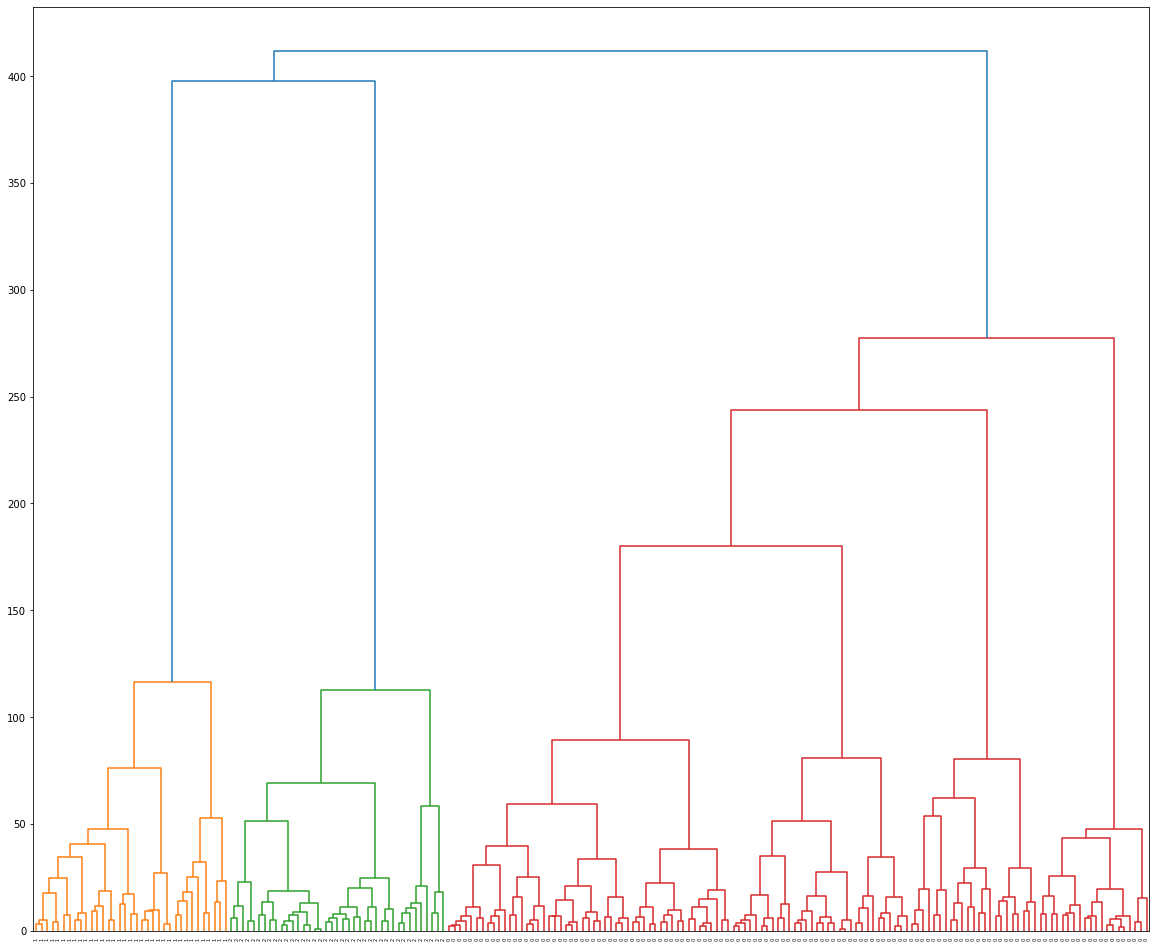

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

df['aggl_res_3'] = get_aggl_clustering(X, 3)

# расссчитаем расстояния между кластерами
linked = linkage(X, 'ward')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между друг другом
dendrogram(Z=linked,
            orientation='top',
            labels=df['aggl_res_3'].to_list(),
            distance_sort='descending')
plt.show()

In [41]:
df['aggl_res_6'] = get_aggl_clustering(df[['age', 'annual_income', 'spending_score']], 6)
get_3d_visualization(df, 'aggl_res_6')

Итак, кластеры разделились хорошо.

Теперь давайте воспользуемся коэффициентом силуэта и узнаем оптимальное количество кластеров. Совпадает ли это число с тем, что мы подобрали, используя дендрограмму?

<AxesSubplot:xlabel='cluster', ylabel='silhouette'>

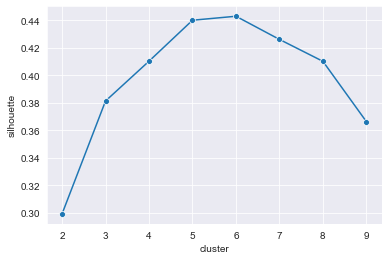

In [42]:
from sklearn.metrics import silhouette_score
import seaborn as sns

# напишем функцию для подсчёта коэффициента силуэта
def get_silhouette_agg_clust(X, cluster_num):
    # проведём агломеративную кластеризацию с заданным количеством кластеров
    res = get_aggl_clustering(X, cluster_num)
    # рассчитаем коэффициент силуэта
    silhouette = silhouette_score(X, res)
    return silhouette


# создадим пустой словарь, ключами будут коэффициент силуэта и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}


for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette_agg_clust(X, cluster_num))
    silhouette_res["cluster"].append(cluster_num)

# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker="o")